In [37]:
##TASK 1 : Basic Decision Tree

import os
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.externals.six import StringIO
import pydot
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
import math
import graphviz
import numpy as np

os.chdir('/cal/homes/tchibozo/Desktop/SD201/skysurvey')

frame = pd.read_csv("Skyserver.csv")

sky_feature_names = list(frame.columns.values)
sky_feature_names.remove('objid')
sky_feature_names.remove('class')

sky_training_data = pd.read_csv("training_data.csv")
sky_training_target = pd.read_csv("training_class.csv")

sky_target_names = np.array(['STAR','GALAXY','QSO'], dtype='|S10')

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(sky_training_data, sky_training_target)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=sky_feature_names,  
                         class_names=sky_target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  


graphv = graphviz.Source(dot_data)  
#print the decision tree in a pdf file
from sklearn.externals.six import StringIO
import pydot
import graphviz

import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=sky_feature_names,  
                         class_names=sky_target_names,  
                         filled=True, rounded=True,  
                         special_characters=True  
                    )
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("skyDefault.pdf")


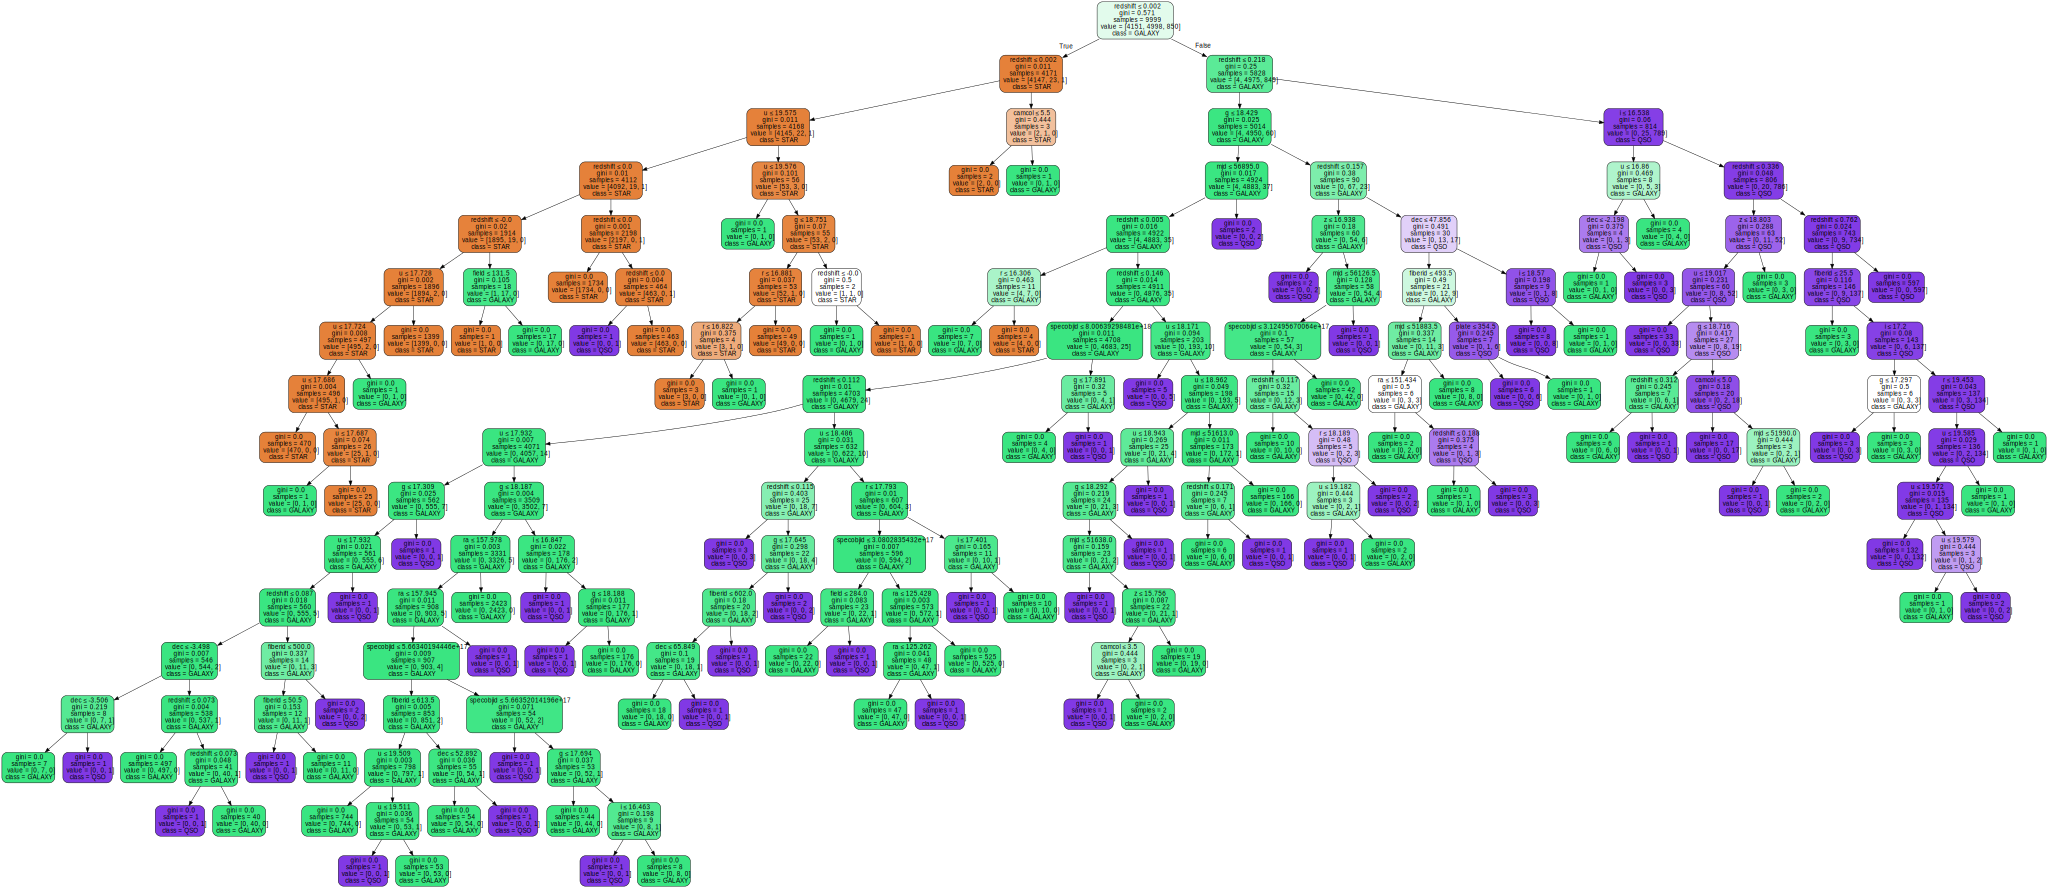

In [38]:
graphv

In [63]:
print "training errors:"+str((1-clf.score(sky_training_data,sky_training_target)))
print "Number of nodes in the tree:" +str(clf.tree_.node_count)
print "Generalized error: " + str(generalized_error(clf))

training errors:0.0
Number of nodes in the tree:203
Generalized error: 51.0


In [56]:
#TASK 2 : Generalization error 

def count_leaves(clf):
    children_left = list(clf.tree_.children_left)
    return children_left.count(-1)

def generalized_error(clf):
    leaf_nb = count_leaves(clf)
    training_error = 1-clf.score(sky_training_data,sky_training_target)
    leaf_error = 0.5*leaf_nb
    generalization_error = training_error + leaf_error
    return generalization_error

In [62]:
#TASK 3 : Umproving the initial decision tree

import os
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.externals.six import StringIO
import pydot
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
import math
import graphviz
import numpy as np

os.chdir('/cal/homes/tchibozo/Desktop/SD201/skysurvey')

from sklearn.externals.six import StringIO
import pydot
import graphviz

import pydot

frame = pd.read_csv("Skyserver.csv")

sky_feature_names = list(frame.columns.values)
sky_feature_names.remove('objid')
sky_feature_names.remove('class')

sky_training_data = pd.read_csv("training_data.csv")
sky_training_target = pd.read_csv("training_class.csv")

sky_target_names = np.array(['STAR','GALAXY','QSO'], dtype='|S10')

def get_minimal_generalized_error_tree():
    current_error = 51
    max_nodes=102
    for i in range(102,2,-1):
        clf2 = tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=i)
        clf2 = clf2.fit(sky_training_data, sky_training_target)

        if generalized_error(clf2) < current_error:
            current_error = generalized_error(clf2)
            optimal_tree = clf2
    dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=sky_feature_names,  
                         class_names=sky_target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graphv = graphviz.Source(dot_data)  
    graphv
    
    #print the decision tree in a pdf file
    dot_data = StringIO()
    tree.export_graphviz(optimal_tree, out_file=dot_data, feature_names=sky_feature_names,  
                             class_names=sky_target_names,  
                             filled=True, rounded=True,  
                             special_characters=True  
                        )
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph[0].write_pdf("skyOptimal.pdf")

    return optimal_tree

#graphv2 = graphviz.Source(dot_data)  
clf2 =get_minimal_generalized_error_tree()
print "training errors:"+str((1-clf2.score(sky_training_data,sky_training_target)))
print "Number of nodes in the tree:" +str(clf2.tree_.node_count)
print "Generalized error: " + str(generalized_error(clf2))

training errors:0.01130113011301126
Number of nodes in the tree:5
Generalized error: 1.5113011301130113


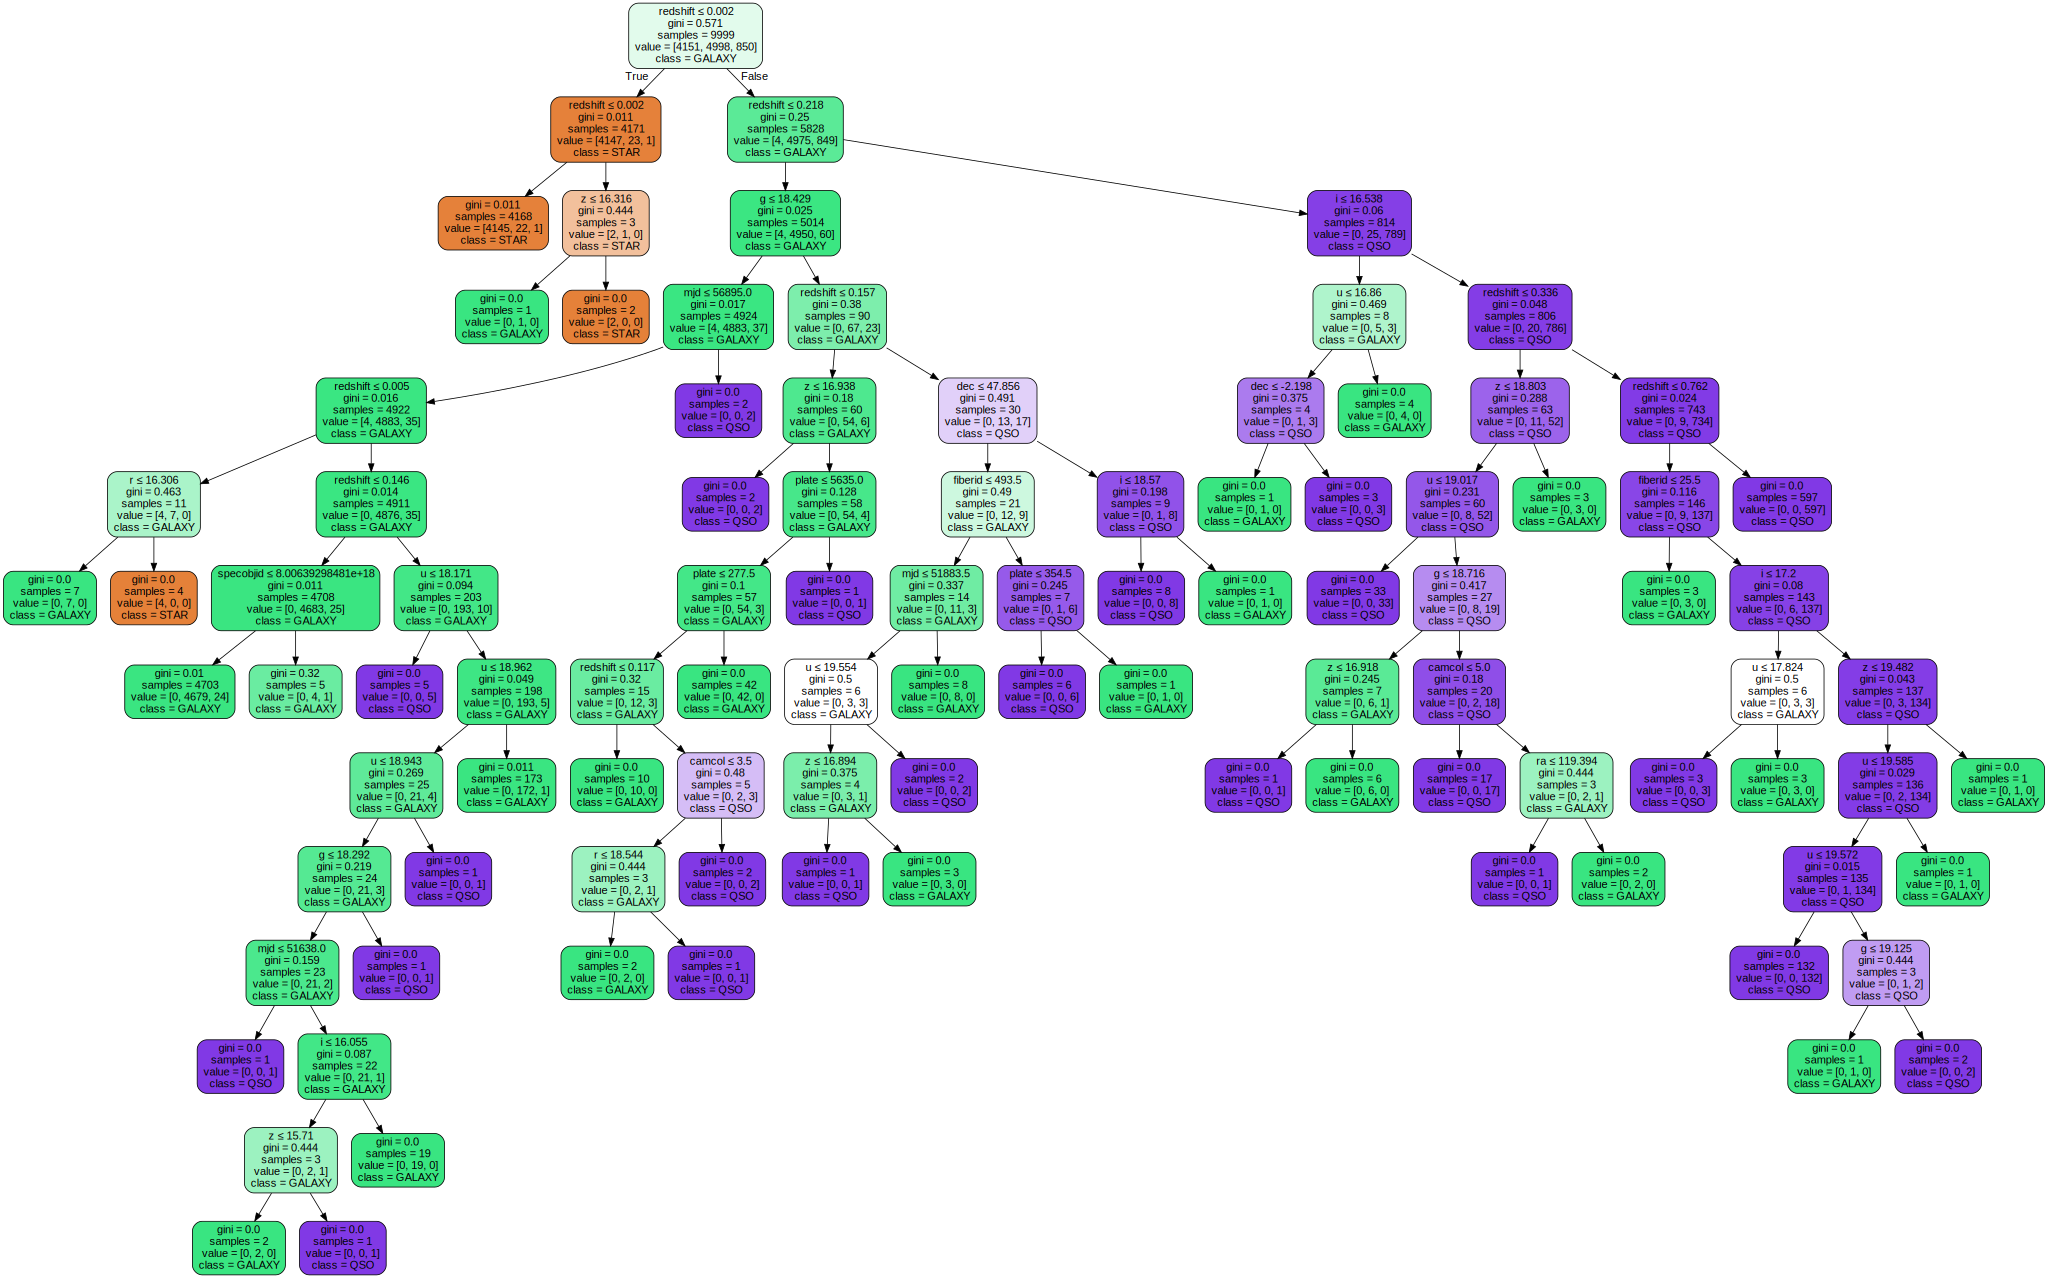

In [51]:
graphv2
